In [1]:
import itertools
import json
import datetime, time
import pytz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import nltk
import pickle

from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.externals.joblib import Memory
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from textblob import TextBlob

%matplotlib inline
np.random.seed(42)
random.seed(42)

In [2]:
def prase_dataset(file):
    """
    On game day: 2015-02-01, from 12:00:00 to 24:00:00
    1. compute the pass of time using 5-miniute unit
    2. compute polarity and subjectivity for each tweet
    
    """
    start_time = time.mktime(time.strptime("2015-02-01 12:00:00",'%Y-%m-%d %H:%M:%S'))
    end_time = time.mktime(time.strptime("2015-02-02 00:00:00",'%Y-%m-%d %H:%M:%S'))   
    pst_tz = pytz.timezone('America/Los_Angeles')
    # extract raw features
    data_raw = []
    for line in open(path + file, 'r') :
        a = json.loads(line)
        citation_date = a['citation_date']
        
        if start_time < citation_date < end_time:
            ptime = datetime.datetime.fromtimestamp(citation_date, pst_tz)                    
            minute = ((ptime.hour-12))*12 + ptime.minute//5 + 1        
            text = a['tweet']['text']
            testimonial = TextBlob(text)
            data_raw.append([ptime, minute, text,
                             testimonial.sentiment.polarity,
                             testimonial.sentiment.subjectivity])

    # generate raw pandas dataframe
    pddata_raw = pd.DataFrame(data_raw,columns=['time','minute5','text',
                                                'polarity','subjectivity'])
    
    return pddata_raw

## Read the data

In [3]:
path = "./ECE219_tweet_data/"

files = ["tweets_#gohawks.txt", "tweets_#gopatriots.txt", \
        "tweets_#nfl.txt", "tweets_#patriots.txt", \
        "tweets_#sb49.txt", "tweets_#superbowl.txt"]
topics = ["gohawks", "gopatriots", "nfl", "patriots", "sb49", "superbowl"]

for i, fl in enumerate(files):
    print("files[" + str(i) + "] => " + fl)

files[0] => tweets_#gohawks.txt
files[1] => tweets_#gopatriots.txt
files[2] => tweets_#nfl.txt
files[3] => tweets_#patriots.txt
files[4] => tweets_#sb49.txt
files[5] => tweets_#superbowl.txt


In [4]:
# sentiment = dict()
# for f in files:
#     pddata = prase_dataset(f)
#     grouped = pddata.groupby(pddata['minute5'])
#     sentiment[f] = grouped.agg([np.sum, np.mean, np.std])

In [5]:
# save the data using python built-in method
# filename = 'sentiment.sav'
# pickle.dump(sentiment, open(filename, 'wb'))


In [6]:
sentiment = pickle.load(open('sentiment.sav', 'rb'))

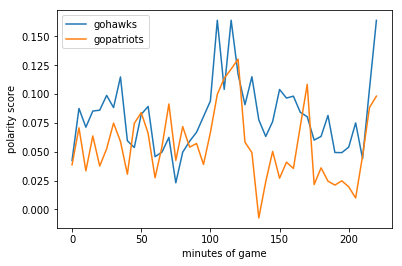

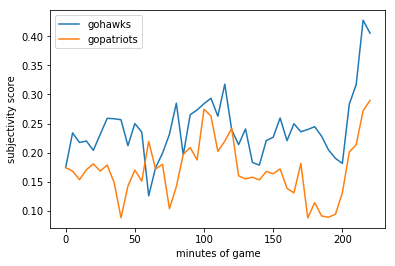

In [7]:
# during game 42(*5mins) to 86(*5imins)
gametime = [x*5 for x in range(0,45)]
plt.plot(gametime,sentiment['tweets_#gohawks.txt'][42:87]['polarity']['mean'])
plt.plot(gametime,sentiment['tweets_#gopatriots.txt'][42:87]['polarity']['mean'])
plt.xlabel('minutes of game')
plt.ylabel('polarity score')
plt.legend(['gohawks','gopatriots'])
plt.show()

plt.plot(gametime,sentiment['tweets_#gohawks.txt'][42:87]['subjectivity']['mean'])
plt.plot(gametime,sentiment['tweets_#gopatriots.txt'][42:87]['subjectivity']['mean'])
plt.xlabel('minutes of game')
plt.ylabel('subjectivity score')
plt.legend(['gohawks','gopatriots'])
plt.show()

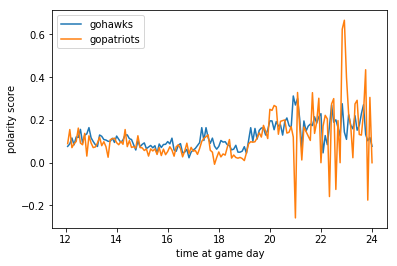

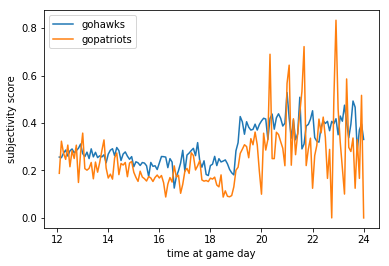

In [8]:
hours1 = [12 + x/12 for x in sentiment['tweets_#gohawks.txt'].index]
hours2 = [12 + x/12 for x in sentiment['tweets_#gopatriots.txt'].index]

plt.plot(hours1,sentiment['tweets_#gohawks.txt']['polarity']['mean'])
plt.plot(hours2,sentiment['tweets_#gopatriots.txt']['polarity']['mean'])
plt.xlabel('time at game day')
plt.ylabel('polarity score')
plt.legend(['gohawks','gopatriots'])
plt.show()

plt.plot(hours1,sentiment['tweets_#gohawks.txt']['subjectivity']['mean'])
plt.plot(hours2,sentiment['tweets_#gopatriots.txt']['subjectivity']['mean'])
plt.xlabel('time at game day')
plt.ylabel('subjectivity score')
plt.legend(['gohawks','gopatriots'])
plt.show()

tweets_#nfl.txt


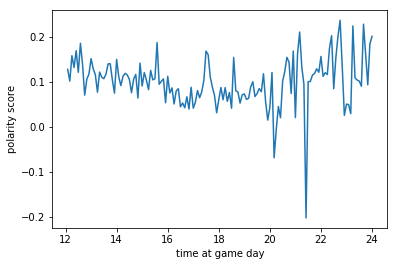

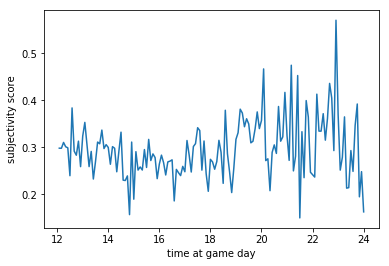

tweets_#patriots.txt


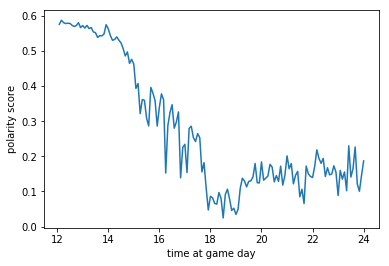

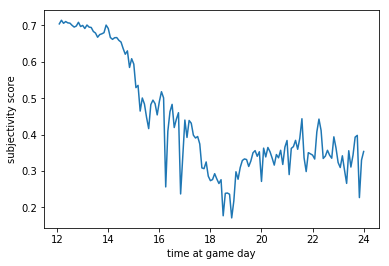

tweets_#sb49.txt


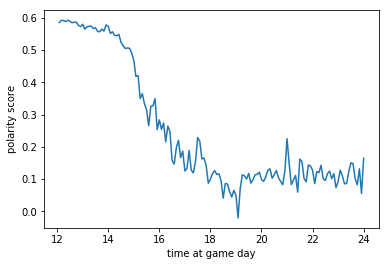

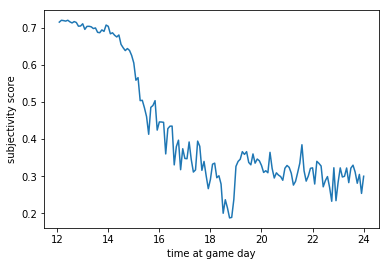

tweets_#superbowl.txt


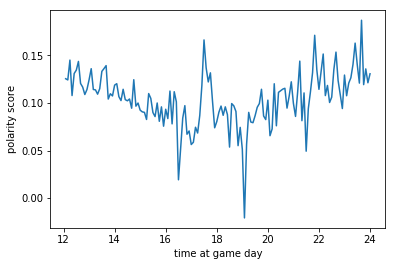

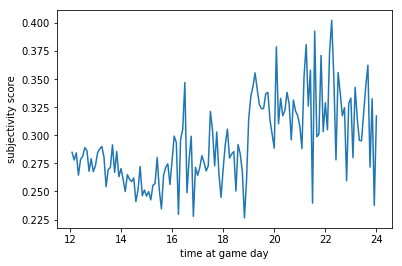

In [10]:
hours = [12 + x/12 for x in sentiment['tweets_#gohawks.txt'].index]
for f in files[2:]:
    print(f)
    plt.plot(hours,sentiment[f]['polarity']['mean'])
    plt.xlabel('time at game day')
    plt.ylabel('polarity score')
    plt.show()
    
    plt.plot(hours,sentiment[f]['subjectivity']['mean'])
    plt.xlabel('time at game day')
    plt.ylabel('subjectivity score')
    plt.show()